<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/project6_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Users/kenny/downloads/filmdeathcounts.csv')

In [ ]:
df

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7
...,...,...,...,...,...,...,...,...
540,Zatoichi,2003,81,R,Action|Comedy|Crime,Takeshi Kitano,116,7.6
541,Zodiac,2007,3,R,Crime|Drama|Mystery|Thriller,David Fincher,157,7.7
542,Zombieland,2009,109,R,Comedy|Horror,Ruben Fleischer,88,7.7
543,Zoolander,2001,4,PG-13,Comedy,Ben Stiller,89,6.5


In [ ]:
x = df[["Body_Count"]]

In [ ]:
y = df[["IMDB_Rating"]]

In [ ]:
table = pd.concat([x,y],axis=1)

In [ ]:
table['product'] = table.Body_Count * table.IMDB_Rating
table['x squared'] = table.Body_Count * table.Body_Count
table

,Body_Count,IMDB_Rating,product,x squared
0,7,7.3,51.1,49
1,53,7.6,402.8,2809
2,212,7.0,1484.0,44944
3,67,6.6,442.2,4489
4,600,7.7,4620.0,360000
...,...,...,...,...
540,81,7.6,615.6,6561
541,3,7.7,23.1,9
542,109,7.7,839.3,11881
543,4,6.5,26.0,16


In [ ]:
# formula for our coefficient a_1 
#(n (sum of products) - product of sums )/ n(sum of xsquares) - square of xsums

n = len(table)
sum_x = table['Body_Count'].sum()
sum_y = table['IMDB_Rating'].sum()
sum_xy = table['product'].sum()
sum_xsquared = table['x squared'].sum()

a_1 = ((n * sum_xy) * - sum_x * sum_y) / ((n * sum_xsquared) - (sum_x)**2)
a_1

-8552452.486051874

In [ ]:
# formula for our coefficient a_0
# sum of y / n - a_1 (sum of x / n)
a_0 = (sum_y / n) - a_1 * (sum_x / n)
a_0 

616765217.953939

**We have found our linear function modeling the regression between the amount of people perishing in a movie and its subsequent IMDB rating. $y = 6.168 \times 10^9 - (8.552 \times 10^7)x$ is our regression function (up to 4 significant digits).**

In [ ]:
#regression function
def linear_prediction(x_val):
    y_val = 616765217.953939 -8552452.486051874 * x_val
    return y_val

In [ ]:
table['error']= table.Body_Count - linear_prediction(table.Body_Count)
table['error^2'] = table.error * table.error
table

,Body_Count,IMDB_Rating,product,x squared,error,error^2
0,7,7.3,51.1,49,-5.568980e+08,3.101354e+17
1,53,7.6,402.8,2809,-1.634852e+08,2.672741e+16
2,212,7.0,1484.0,44944,1.196355e+09,1.431265e+18
3,67,6.6,442.2,4489,-4.375083e+07,1.914136e+15
4,600,7.7,4620.0,360000,4.514707e+09,2.038258e+19
...,...,...,...,...,...,...
540,81,7.6,615.6,6561,7.598351e+07,5.773494e+15
541,3,7.7,23.1,9,-5.911079e+08,3.494085e+17
542,109,7.7,839.3,11881,3.154522e+08,9.951010e+16
543,4,6.5,26.0,16,-5.825554e+08,3.393708e+17


In [ ]:
table['error^2'].sum()

3.4141593935259166e+20

**We find our sum of the squared residual to be $\sum_{i=1}^{n} E_{i}^2 = 3.414 \times 10^{20} $.**

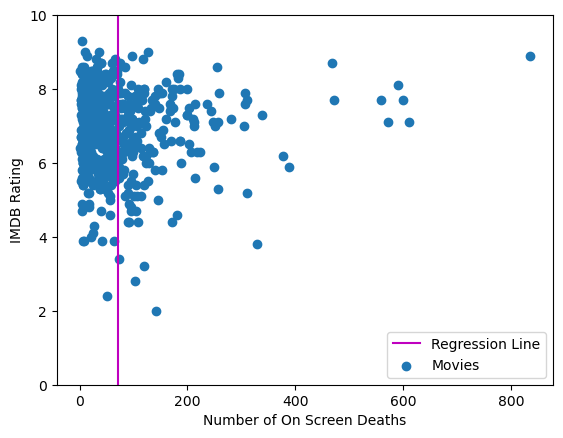

In [ ]:
x_space = np.arange(0,836)
y_space = linear_prediction(x_space)
plt.ylim(0,10)
plt.xlabel('Number of On Screen Deaths')
plt.ylabel('IMDB Rating')
plt.plot(x_space,y_space,'m',label="Regression Line")
plt.scatter(x,y,label='Movies')
plt.legend()
plt.show()

**For part two we are going to compare the number of deaths to the runtime of the movie. We will model this relationship using a growth model, under the assumption that the longer a movie is, the higher the death toll. Of course, there will be outliers, but the growth model most accurately describes how the quantities relate to one another. We will try to find a line of best fit using the model $\frac{1}{y} = \frac{b+x}{ax}$, where $b$ and $a$ are unknown parameters, $x$ is the runtime of the movie, and $y$ is the number of deaths.**

**Using the method from the text, we set up a linear regression model using the function
$\begin{equation*} 
z = a_{0} + a_{1}w
\end{equation*}$,
where $ z = \frac{1}{y}$, $a_{0} = \frac{1}{a}$, $a_{1} = \frac{b}{a}$, and $w = \frac{1}{x}$. Note that $a$ and $b$ can be rewritten in terms of $a_{0}$ and $a_{1}$, such that $a = \frac{1}{a_{0}}$ and $b= \frac{a_{1}}{a_{0}}$. We set up our table and begin to solve for $a$ and $b$ (really $a_{0}$ and $a_{1}$).**

In [ ]:
#setting up separate table to manipulate data
x1 = df[['Length_Minutes']]
y1 = df[['Body_Count']]
table1 = pd.concat([x1,y1],axis=1)

table1['w']= 1 / table1.Length_Minutes
table1['z']= 1 / table1.Body_Count
table1['wz'] = table1.w * table1.z
table1['w^2'] = table1.w * table1.w
table1

,Length_Minutes,Body_Count,w,z,wz,w^2
0,117,7,0.008547,0.142857,0.001221,0.000073
1,113,53,0.008850,0.018868,0.000167,0.000078
2,100,212,0.010000,0.004717,0.000047,0.000100
3,113,67,0.008850,0.014925,0.000132,0.000078
4,117,600,0.008547,0.001667,0.000014,0.000073
...,...,...,...,...,...,...
540,116,81,0.008621,0.012346,0.000106,0.000074
541,157,3,0.006369,0.333333,0.002123,0.000041
542,88,109,0.011364,0.009174,0.000104,0.000129
543,89,4,0.011236,0.250000,0.002809,0.000126


**Using the same formula from Part 1, we find $a_{0}$ and $a_{1}$ using our values for $w$ and $z$.**

In [ ]:
n = len(table1)
sum_w = table1['w'].sum()
sum_z = table1['z'].sum()
sum_wz = table1['wz'].sum()
sum_ww = table1['w^2'].sum()
square_sum_w = table1['w'].sum() * table1['w'].sum()

A_1 = ((n * sum_wz) - sum_w * sum_z) / ((n * sum_ww) - square_sum_w)

A_0 = (sum_z / n) - A_1 * (sum_w / n)

**Now that we have found our values for $a_{0}$ and $a_{1}$, we can substitute those in to find a value for a and b.**

In [ ]:
a = 1 / A_0
b = A_1 / A_0
b

39.106811364904914

**The equation modeling our regression is $\frac{1}{y} = \frac{39.107 + x}{23.103x}$.**

In [ ]:
#note that function calculates the reciprocal of our real model
def nonlinear_prediction(x):
    y = (a*x) / (b+x)
    return y

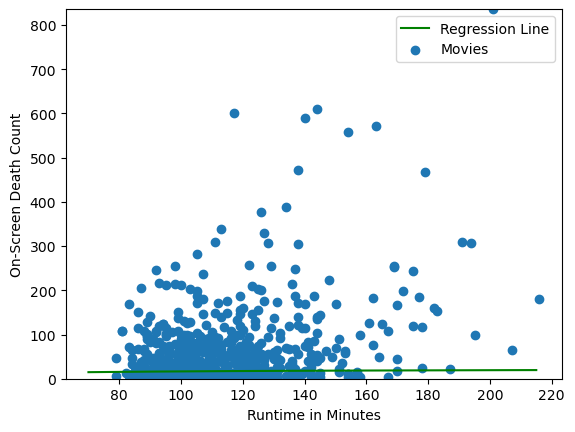

In [ ]:
x_ = np.arange(70,216)
y_ = nonlinear_prediction(x_)
plt.ylim(0,836)
plt.plot(x_,y_,'g',label = 'Regression Line')
plt.scatter(x1,y1,label = 'Movies')
plt.xlabel('Runtime in Minutes')
plt.ylabel('On-Screen Death Count')
plt.legend()
plt.show()

**We can see that the chosen regression model was not a wonderful fit for the data. It does not appear as though there is a nonlinear relationship between the runtime of a movie and the number of on-screen deaths. Perhaps a saturation growth model would have befit the data better, but it does not appear as though there is any correlation in the data points here.**